### Exercise 1
Question n°1 : On contitue la base de fichier nomée Data à partir de textes en Français et en Anglais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
i=1
Data=[]
while i<17:              # On isole les textes en Français
    i=str(i)
    m=open("/home/lakrout/Documents/Cours_2020_Data/Cours non supervisé/Texte projet/Document sans nom "+i,"r")
    k=m.read()
    Data.append([k,-1])
    i=int(i)
    i=i+1
i=1
while i<16:              # On isole les textes en Anglais
    i=str(i)
    m=open("/home/lakrout/Documents/Cours_2020_Data/Cours non supervisé/Texte projet/Document sans nom "+i+" en","r")
    k=m.read()
    Data.append([k,1])
    i=int(i)
    i=i+1
def remp_carac(ligne):
        """ Remplace les caractères spéciaux d'un texte """
        ancien = ['é', 'è', 'ê', 'à', 'ù', 'û', 'ç', 'ô', 'î', 'ï', 'â','A','B','C','D','E','F','G','H','I','J','K','L','M','N'
                 ,'O','P','Q','R','S','T','U','V','W','X','Y','Z','\n',']','/',"\'"]
        nouveau = ['e', 'e', 'e', 'a', 'u', 'u', 'c', 'o', 'i', 'i', 'a','a','b','c','d','e','f','g','h','i','j','k','l','m','n'
                 ,'o','p','q','r','s','t','u','v','w','x','y','z',' ','','',"'"]
        i = 0
        while i < len(ancien):
            ligne = ligne.replace(ancien[i], nouveau[i])
            i += 1
        return ligne
i=0
while i<31:    
    Data[i][0]=remp_carac(Data[i][0])
    i=i+1

Question n°2 : On calcule la matrice X des log-fréquences à partir de notre base de données Data

In [2]:
i=0
while i<31:    
    Data[i][0]=remp_carac(Data[i][0])
    i=i+1
v=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
v=np.array(v)
freq=np.zeros((31,len(v)))
i=0
while i<31:               # On construit les log fréquences des textes
    j=0
    while j<len(Data[i][0]):
        k=0
        while k<len(v):
            if Data[i][0][j]==v[k]:
                freq[i,k]=freq[i,k]+1
                break
            k=k+1
        j=j+1
    freq[i,:]=freq[i,:]/sum(freq[i,:])
    i=i+1
X=np.log(1+freq)          # Les log-fréquences des textes
X.shape

(31, 26)

Question n°3 : On affiche un histogramme qui compare les log fréquences des lettres entre les textes Français et Anglais 

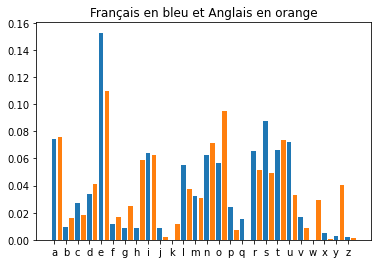

In [3]:
Dfr=X[0:16,:]      # Les log-fréquences des textes en Français
Den=X[16:31,:]     # Les log-fréquences des textes en Français
i=0
Hfr=np.zeros((len(v)))
Hen=np.zeros((len(v)))
while i<len(v):
    Hfr[i]=np.mean(Dfr[:,i])
    Hen[i]=np.mean(Den[:,i])
    i=i+1
plt.bar(2*np.arange(26),Hfr,tick_label=v)
plt.title('Français en bleu et Anglais en orange')
plt.bar(2*np.arange(26)+1,Hen)
plt.show()

On remarque une différence de fréquences d'apparition de lettres dans les deux langues. Cela laisse penser que l'on pourra les distinguer statistiquement a l'aide d'algorithme de Machine Learning non supervisé.

### Exercise 2

### 1)

Pour estimer les parametres de ce modèle nous allons utiliser un algoritme d'estimation-maximisation avec la suposition que nous avons à faire à un mélange gaussien ( on doit donc estimer les moyennes les variances et les poids des deux classes ). On peux donc théoriquement calculer les estimateur de la moyenne et de la variance pour l'étape de maximisation. Ces dernier sont les estimateurs classique de la moyenne et de la variance dans un modèle gaussien. 

In [4]:
from scipy.stats import multivariate_normal 
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

Il a fallu 5 boucles pour que l'algorithme converge


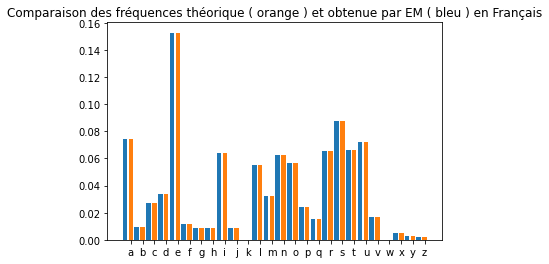

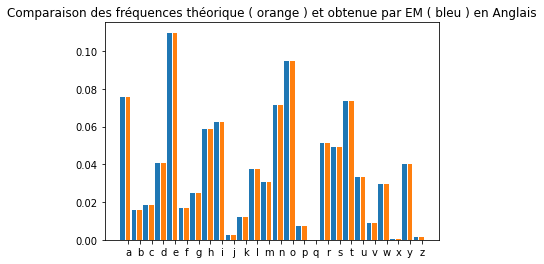

In [5]:
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]]) 
def NB_EM(Matrice,moy=None,var=None,prop=None,eps=10**(-5),n=10,cond_vrais=False,verbose=False):
    if moy==None:
        moy_fr=np.random.rand(26)
        moy_en=np.random.rand(26)
    else:
        moy_fr=moy[0]
        moy_en=moy[1]
    if prop==None:
        prop_fr=np.random.rand()
        prop_en=1-prop_fr
    else:
        prop_fr=prop
        prop_en=1-prop_fr
    if var==None:
        var_fr=10*np.random.rand(26)+0.1
        var_en=10*np.random.rand(26)+0.1
    else:
        var_fr=var[0]
        var_en=var[1]
    T=np.zeros((31,2))
    i=0
    X=Matrice
    U=np.array([])
    U2=np.array([])
    U3=np.array([])
    U4=np.array([])
    L=0
    j=0
    while j>-1 and j<n:
        i=0
        L2=L
        while i<len(Matrice[:,0]):
            T[i,0]=(prop_fr*multivariate_normal(mean=moy_fr, cov=np.diag(var_fr)).pdf(X[i,:]))/(prop_fr*multivariate_normal(mean=moy_fr, cov=np.diag(var_fr)).pdf(X[i,:])+prop_en*(multivariate_normal(mean=moy_en, cov=np.diag(var_en))).pdf(X[i,:]))
            T[i,1]=(prop_en*multivariate_normal(mean=moy_en, cov=np.diag(var_en)).pdf(X[i,:]))/(prop_fr*multivariate_normal(mean=moy_fr, cov=np.diag(var_fr)).pdf(X[i,:])+prop_en*(multivariate_normal(mean=moy_en, cov=np.diag(var_en))).pdf(X[i,:]))
            i=i+1
        #L=np.sum(T[:,0]*np.log(0.0000001+prop_fr*multivariate_normal(mean=moy_fr, cov=np.diag(var_fr)).pdf(X))+T[:,1]*np.log(0.0000001+prop_en*multivariate_normal(mean=moy_en, cov=np.diag(var_en)).pdf(X)))
        prop_fr=np.mean(T[:,0])
        prop_en=np.mean(T[:,1])
        i=0
        moy_fr=0
        moy_en=0
        while i<len(Matrice[:,0]):
            moy_fr=moy_fr+T[i,0]*X[i,:]
            moy_en=moy_en+T[i,1]*X[i,:]
            i=i+1
        moy_fr=moy_fr/np.sum(T[:,0])
        moy_en=moy_en/np.sum(T[:,1])
        i=0
        var_fr=0
        var_en=0
        while i<len(Matrice[:,0]):
            var_fr=var_fr+T[i,0]*(X[i,:]-moy_fr)*(X[i,:]-moy_fr)
            var_en=var_en+T[i,1]*(X[i,:]-moy_en)*(X[i,:]-moy_en)
            i=i+1
        var_fr=var_fr/np.sum(T[:,0])+10**(-10)
        var_en=var_en/np.sum(T[:,1])+10**(-10)
        #U=np.append(U,np.abs((L-L2)/L))
        U2=np.append(U2,np.linalg.norm(moy_fr,ord=1))
        U3=np.append(U3,np.linalg.norm(var_fr,ord=1))
        U4=np.append(U4,prop_fr)
        if cond_vrais==True:
            if j>3 and np.abs(U2[j-3]-U2[j-2])==0 and np.abs(U2[j-2]-U2[j-1])==0 and np.abs(U2[j-1]-U2[j])==0 and np.abs(U3[j-3]-U3[j-2])==0 and np.abs(U3[j-2]-U3[j-1])==0 and np.abs(U3[j-1]-U3[j])==0 and np.abs(U4[j-3]-U4[j-2])==0 and np.abs(U4[j-2]-U4[j-1])==0 and np.abs(U4[j-1]-U4[j])==0:
                if verbose==True:
                    print("Il a fallu",j-2, "boucles pour que l'algorithme converge")
                break
            if j==n-1:
                if verbose==True:
                    print("Il a fallu",n, "boucles pour atteindre ce résultat pourtant la vraisemblance continue a diminuer")
        j=j+1
    moy_fr2=moy_fr
    moy_en2=moy_en
    var_fr2=var_fr
    var_en2=var_en
    prop_fr2=prop_fr
    prop_en2=prop_en
    if moy_fr[24]>moy_en[24]:
        moy_fr=moy_en2
        moy_en=moy_fr2
        var_fr=var_en2
        var_en=var_fr2
    if prop_en>prop_fr:
        prop_fr=prop_en2
        prop_en=prop_fr2
    return moy_fr,moy_en,var_fr,var_en,prop_fr,prop_en
v=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
a=NB_EM(X,prop=0.2,n=50,cond_vrais=True,verbose=True)
plt.bar(2*np.arange(26),a[0],)
plt.bar(2*np.arange(26)+1,Hfr,tick_label=v)
plt.title('Comparaison des fréquences théorique ( orange ) et obtenue par EM ( bleu ) en Français')
plt.show()
plt.bar(2*np.arange(26),a[1])
plt.title('Comparaison des fréquences théorique ( orange ) et obtenue par EM ( bleu ) en Anglais')
plt.bar(2*np.arange(26)+1,Hen,tick_label=v)
plt.show()

### 2)

On définit maintenant notre classifieur :

In [6]:
def classif(text,a,verbose=False):
    v=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    text=remp_carac(text)
    j=0
    freq2=np.zeros(26)
    while j<len(text):
        k=0
        while k<len(v):
            if text[j]==v[k]:
                freq2[k]=freq2[k]+1
                break
            k=k+1
        j=j+1
    l=0
    while l<26:
        freq2=freq2/sum(freq2)
        l=l+1
    freq2=np.log(1+freq2)
    res_fr=multivariate_normal(mean=a[0], cov=np.diag(a[2])).pdf(freq2)*a[4]
    res_en=multivariate_normal(mean=a[1], cov=np.diag(a[3])).pdf(freq2)*a[5]
    if res_fr<res_en:
        if verbose==True:
            print("Le texte est en Anglais !")
        return 1
    else:
        if verbose==True:
            print("Le texte est en Français !")
        return -1
p=0
while p<31:
    text=Data[p][0]
    #print("Numéro",p)
    classif(text,a,verbose=True)
    p=p+1

Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Français !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !
Le texte est en Anglais !


### 3)

On evalue ces performances par validation croisée en séparant ici notre base d'apprentissage en faisant du 3-fold :

([<matplotlib.axis.XTick at 0x7f6ed6317940>,
 [Text(1, 0, 'acc'),
  Text(2, 0, 're'),
  Text(3, 0, 'roc'),
  Text(4, 0, 'pr'),
  Text(5, 0, 'f1')])

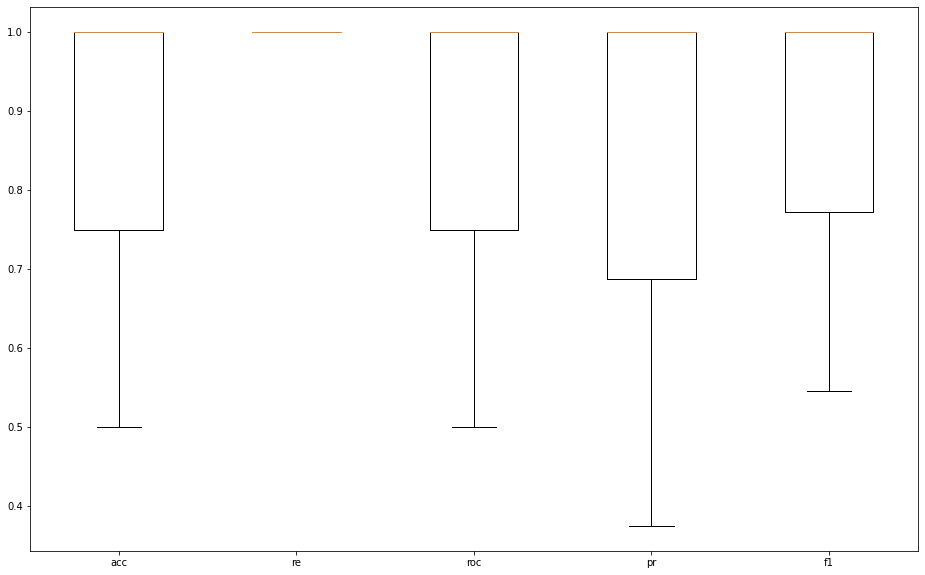

In [7]:
from sklearn.model_selection import KFold
from sklearn import metrics
from matplotlib import rcParams

Data2=np.array(Data)
Data2=Data2[:,0]
kf = KFold(n_splits=3,shuffle=True)
i=0
label=np.zeros(31)
while i<16:
    label[i]=-1
    i=i+1
while i<31:
    label[i]=1
    i=i+1
acc=[]
re=[]
roc=[]
pr=[]
f1=[]
for i,j in kf.split(Data2,label):
    data_train=Data2[i]
    label_train=label[i]
    data_test=Data2[j]
    label_test=label[j]
    i=0
    while i<len(data_train):    
        data_train[i]=remp_carac(data_train[i])
        i=i+1
    v=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    v=np.array(v)
    freq=np.zeros((len(data_train),len(v)))
    i=0
    while i<len(data_train):               # On construit les log fréquences des textes
        j=0
        while j<len(data_train[i]):
            k=0
            while k<len(v):
                if data_train[i][j]==v[k]:
                    freq[i,k]=freq[i,k]+1
                    break
                k=k+1
            j=j+1
        freq[i,:]=freq[i,:]/sum(freq[i,:])
        i=i+1
    X_train=np.log(1+freq)
    machine=NB_EM(X_train,n=100,cond_vrais=True)
    i=0
    prediction_test=np.array([])
    while i<len(data_test):
        prediction_test=np.append(prediction_test,classif(data_test[i],machine,verbose=False))
        i=i+1
    acc.append(metrics.accuracy_score(label_test, prediction_test))
    re.append(metrics.recall_score(label_test, prediction_test,pos_label=-1))
    roc.append(metrics.accuracy_score(label_test, prediction_test))
    pr.append(metrics.precision_score(label_test, prediction_test,pos_label=-1))
    f1.append(metrics.f1_score(label_test, prediction_test,pos_label=-1))
rcParams['figure.figsize'] = 35,10
plt.subplot(121)
plt.boxplot([acc,re,roc,pr,f1])
plt.xticks([1,2,3,4,5],["acc", "re", "roc","pr","f1"])

### Exercise 3

### 1)

In [8]:
Data=np.array(Data)
v=[' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
v=np.array(v)
proba_ini=np.zeros((31,len(v)))
i=0
while i<len(Data):
    j=0
    while j<len(v):
        h=0
        while h<len(Data[i][0]):
            if Data[i][0][h]==v[j]:
                proba_ini[i,j]=proba_ini[i,j]+1
            h=h+1
        j=j+1
    proba_ini[i,:]=proba_ini[i,:]/np.sum(proba_ini[i,:])
    i=i+1
    print('Il reste',31-i,'étapes pour le calcul des fréquences !')

Il reste 30 étapes pour le calcul des fréquences !
Il reste 29 étapes pour le calcul des fréquences !
Il reste 28 étapes pour le calcul des fréquences !
Il reste 27 étapes pour le calcul des fréquences !
Il reste 26 étapes pour le calcul des fréquences !
Il reste 25 étapes pour le calcul des fréquences !
Il reste 24 étapes pour le calcul des fréquences !
Il reste 23 étapes pour le calcul des fréquences !
Il reste 22 étapes pour le calcul des fréquences !
Il reste 21 étapes pour le calcul des fréquences !
Il reste 20 étapes pour le calcul des fréquences !
Il reste 19 étapes pour le calcul des fréquences !
Il reste 18 étapes pour le calcul des fréquences !
Il reste 17 étapes pour le calcul des fréquences !
Il reste 16 étapes pour le calcul des fréquences !
Il reste 15 étapes pour le calcul des fréquences !
Il reste 14 étapes pour le calcul des fréquences !
Il reste 13 étapes pour le calcul des fréquences !
Il reste 12 étapes pour le calcul des fréquences !
Il reste 11 étapes pour le calc

In [9]:
trans_matrix=np.zeros((31,27,27))
i=0
while i<31:
    j=1
    while j<len(Data[i,0]):
        k=0
        while k<len(v):
            if Data[i,0][j]==v[k]:
                m=0
                while m<len(v):
                    if Data[i,0][j-1]==v[m]:
                        trans_matrix[i,m,k]=trans_matrix[i,m,k]+1
                    m=m+1
            k=k+1
        j=j+1
    i=i+1
    print('Il reste encore',31-i,'étapes avant le calcul des matrices de transitions !' )
i=0
while i<31:
    j=0
    while j<27:
        if sum(trans_matrix[i,j,:])!=0:
            trans_matrix[i,j,:]=trans_matrix[i,j,:]/sum(trans_matrix[i,j,:])
        else:
            trans_matrix[i,j,:]=1/27*np.ones((27))
        j=j+1
    i=i+1

Il reste encore 30 étapes avant le calcul des matrices de transitions !
Il reste encore 29 étapes avant le calcul des matrices de transitions !
Il reste encore 28 étapes avant le calcul des matrices de transitions !
Il reste encore 27 étapes avant le calcul des matrices de transitions !
Il reste encore 26 étapes avant le calcul des matrices de transitions !
Il reste encore 25 étapes avant le calcul des matrices de transitions !
Il reste encore 24 étapes avant le calcul des matrices de transitions !
Il reste encore 23 étapes avant le calcul des matrices de transitions !
Il reste encore 22 étapes avant le calcul des matrices de transitions !
Il reste encore 21 étapes avant le calcul des matrices de transitions !
Il reste encore 20 étapes avant le calcul des matrices de transitions !
Il reste encore 19 étapes avant le calcul des matrices de transitions !
Il reste encore 18 étapes avant le calcul des matrices de transitions !
Il reste encore 17 étapes avant le calcul des matrices de transi

In [10]:
proba_ini_fr=np.mean(proba_ini[0:16,:],axis=0)
proba_ini_en=np.mean(proba_ini[16:31,:],axis=0)
trans_matrix_fr=np.mean(trans_matrix[0:16,:,:],axis=0)
trans_matrix_en=np.mean(trans_matrix[16:31,:,:],axis=0)

In [11]:
p=np.random.uniform(0,1,27)
p=p/sum(p)
i=0
mat=np.zeros((27,27))
while i<27:
    mat[i,:]=np.random.uniform(0,1,27)
    mat[i,:]=mat[i,:]/sum(mat[i,:])
    i=i+1

On défini une fonction permétant de calculer la probabilité d'un tirage sachant une chaine de Markov.

In [12]:
def MC(p,A,X,nb):    # p probabilité initiale, A matrice de transition, X un texte et nb un terme de régularisation.
    v=[' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    u=0
    proba=1
    while u<len(v):
            if X[0]==v[u]:
                proba=proba*p[u]
            u=u+1
    i=1
    while i<len(X):
        j=0
        while j<len(v):
            if X[i]==v[j]:
                k=0
                while k<len(v):
                    if X[i-1]==v[k]:
                        proba=nb*proba*A[k,j]
                    k=k+1
            j=j+1
        i=i+1
    return proba

On écrit l'algorithme EM pour la chaine de Markov.

In [22]:
def MC_EM(Mat,prob,Trans,moy=None,var=None,prop=None,eps=10**(-5),n=10,cond_vrais=False,verbose=False):
    if moy==None:
        moy_fr=np.random.rand(27)
        moy_en=np.random.rand(27)
        moy_fr=moy_fr/np.sum(moy_fr)
        moy_en=moy_en/np.sum(moy_en)
    else:
        moy_fr=moy[0]
        moy_en=moy[1]
    if prop==None:
        prop_fr=np.random.uniform(0.2,0.8)
        prop_en=1-prop_fr
    else:
        prop_fr=prop
        prop_en=1-prop_fr
    var_fr=np.zeros((27,27))
    i=0
    while i<27:
        var_fr[i,:]=np.random.uniform(0,1,27)
        var_fr[i,:]=var_fr[i,:]/sum(var_fr[i,:])
        i=i+1
    var_en=np.zeros((27,27))
    i=0
    while i<27:
        var_en[i,:]=np.random.uniform(0,1,27)
        var_en[i,:]=var_en[i,:]/sum(var_en[i,:])
        i=i+1
    T=np.zeros((len(Mat),2))
    i=0
    U=np.array([])
    U2=np.array([])
    U3=np.array([])
    U4=np.array([])
    L=0
    j=0
    print(prop_fr)
    c=45
    while j>-1 and j<n:
        if j==1:
            c=15
        i=0
        L2=L
        while c>0:
            i=0
            cnt=0
            print(c)
            while i<len(Mat):
                if (MC(moy_fr, var_fr,Mat[i],c)!=float('inf')) & (MC(moy_en, var_en,Mat[i],c)!=float('inf')):
                    cnt=cnt+1
                i=i+1
            if cnt==len(Mat):
                break
            else:
                c=c-1 
        i=0
        while i<len(Mat):
            T[i,0]=(prop_fr*MC(moy_fr, var_fr,Mat[i],c)+0.0000000001)/(prop_fr*MC(moy_fr, var_fr,Mat[i],c)+prop_en*MC(moy_en, var_en,Mat[i],c)+0.0000000001)
            T[i,1]=(prop_en*MC(moy_en, var_en,Mat[i],c)+0.0000000001)/(prop_fr*MC(moy_fr, var_fr,Mat[i],c)+prop_en*MC(moy_en, var_en,Mat[i],c)+0.0000000001)
            if T[i,0]<10**(-20):
                T[i,0]=T[i,0]+0.00001
            if T[i,0]>1-10**(-20):
                T[i,0]=T[i,0]-0.00001
            if T[i,1]<10**(-20):
                T[i,1]=T[i,1]+0.00001
            if T[i,1]>1-10**(-20):
                T[i,1]=T[i,1]-0.00001
            i=i+1
        prop_fr=np.mean(T[:,0])
        prop_en=np.mean(T[:,1])
        print(T[:,0])
        print(prop_fr)
        i=0
        moy_fr=0
        moy_en=0
        while i<len(Mat):
            moy_fr=moy_fr+T[i,0]*prob[i,:]
            moy_en=moy_en+T[i,1]*prob[i,:]
            i=i+1
        moy_fr=moy_fr/np.sum(T[:,0])
        moy_en=moy_en/np.sum(T[:,1])
        i=0
        var_fr=0
        var_en=0
        while i<len(Mat):
            var_fr=var_fr+T[i,0]*Trans[i,:,:]
            var_en=var_en+T[i,1]*Trans[i,:,:]
            i=i+1
        var_fr=var_fr/np.sum(T[:,0])
        var_en=var_en/np.sum(T[:,1])
        U2=np.append(U2,np.linalg.norm(moy_fr,ord=1))
        U3=np.append(U3,np.linalg.norm(var_fr,ord=1))
        U4=np.append(U4,prop_fr)
        if cond_vrais==True:
            if j>3 and np.abs(U2[j-3]-U2[j-2])==0 and np.abs(U2[j-2]-U2[j-1])==0 and np.abs(U2[j-1]-U2[j])==0 and np.abs(U3[j-3]-U3[j-2])==0 and np.abs(U3[j-2]-U3[j-1])==0 and np.abs(U3[j-1]-U3[j])==0 and np.abs(U4[j-3]-U4[j-2])==0 and np.abs(U4[j-2]-U4[j-1])==0 and np.abs(U4[j-1]-U4[j])==0:
                if verbose==True:
                    print("Il a fallu",j-2, "boucles pour que l'algorithme converge")
                break
            if j==n-1:
                if verbose==True:
                    print("Il a fallu",n, "boucles pour atteindre ce résultat pourtant la vraisemblance continue a diminuer")
        j=j+1
    moy_fr2=moy_fr
    moy_en2=moy_en
    var_fr2=var_fr
    var_en2=var_en
    prop_fr2=prop_fr
    prop_en2=prop_en
    if moy_en[7]<moy_fr[7]:
        prop_fr=prop_en2
        prop_en=prop_fr2
        moy_fr=moy_en2
        moy_en=moy_fr2
        var_fr=var_en2
        var_en=var_fr2
    return moy_fr,moy_en,var_fr,var_en,prop_fr,prop_en
m_fr,m_en,mat_fr,mat_en,pr_fr,pr_en=MC_EM(Data[:,0],proba_ini,trans_matrix,moy=None,var=None,prop=None,eps=10**(-5),n=10,cond_vrais=False,verbose=True)

0.6526835130154531
45


<ipython-input-12-a054f33c1a0b>:17: RuntimeWarning: overflow encountered in double_scalars
  proba=nb*proba*A[k,j]


44
43
42
41
40
39
38
[9.99956106e-01 1.00000000e-05 1.00000000e-05 1.00000000e+00
 1.00000000e-05 1.00000000e-05 1.00000000e-05 3.28900628e-10
 1.00000000e+00 6.00431191e-11 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e-05 1.00000000e-05 1.00000000e+00
 1.00000000e-05 1.00000000e+00 3.96567260e-17 1.26718597e-02
 1.00000000e-05 5.36303352e-17 1.00000000e-05 9.99991026e-01
 1.00000000e+00 1.00000000e-05 9.99999898e-01 1.00000000e-05
 1.00000000e-05 1.68412072e-08 2.43544123e-08]
0.35524996553878746
15
14
13
12
[1.00000000e+00 1.00000000e-05 1.00000000e+00 1.00000000e+00
 3.85381688e-17 1.00000000e-05 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e-05 1.00000000e+00 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 9.99995286e-01
 1.00000000e+00 1.00000000e-05 1.00000000e+00 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05]

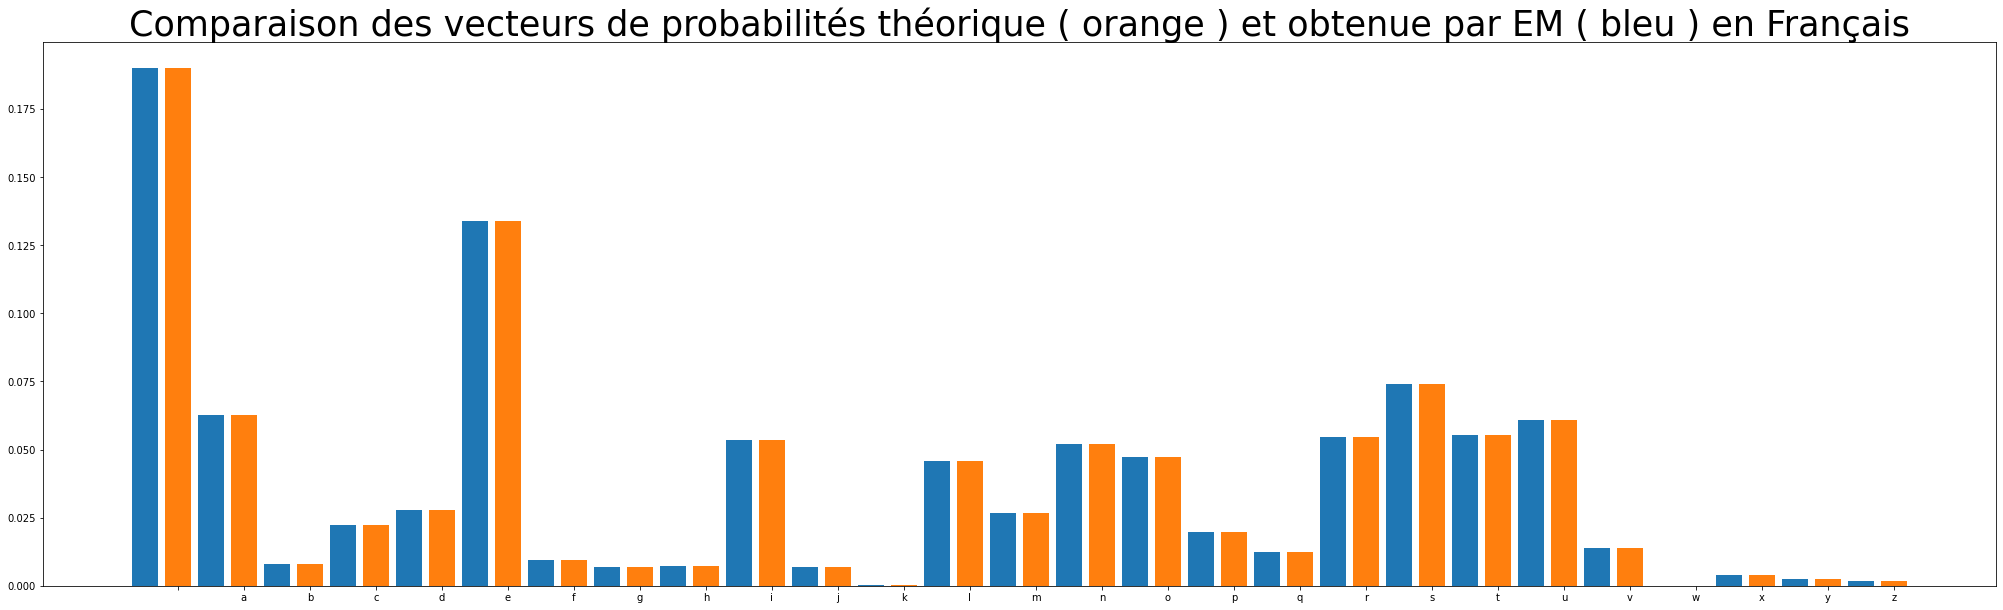

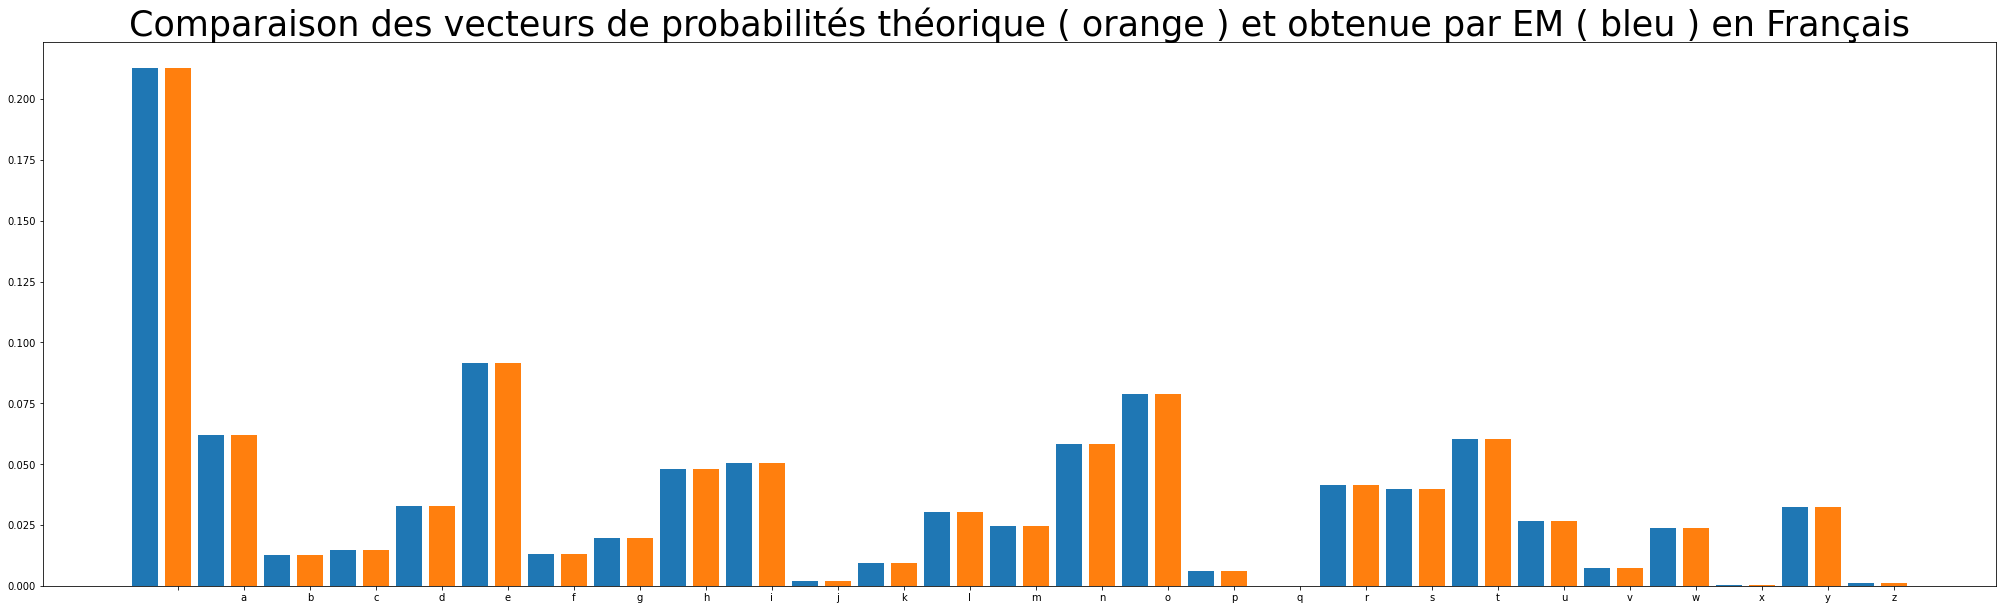

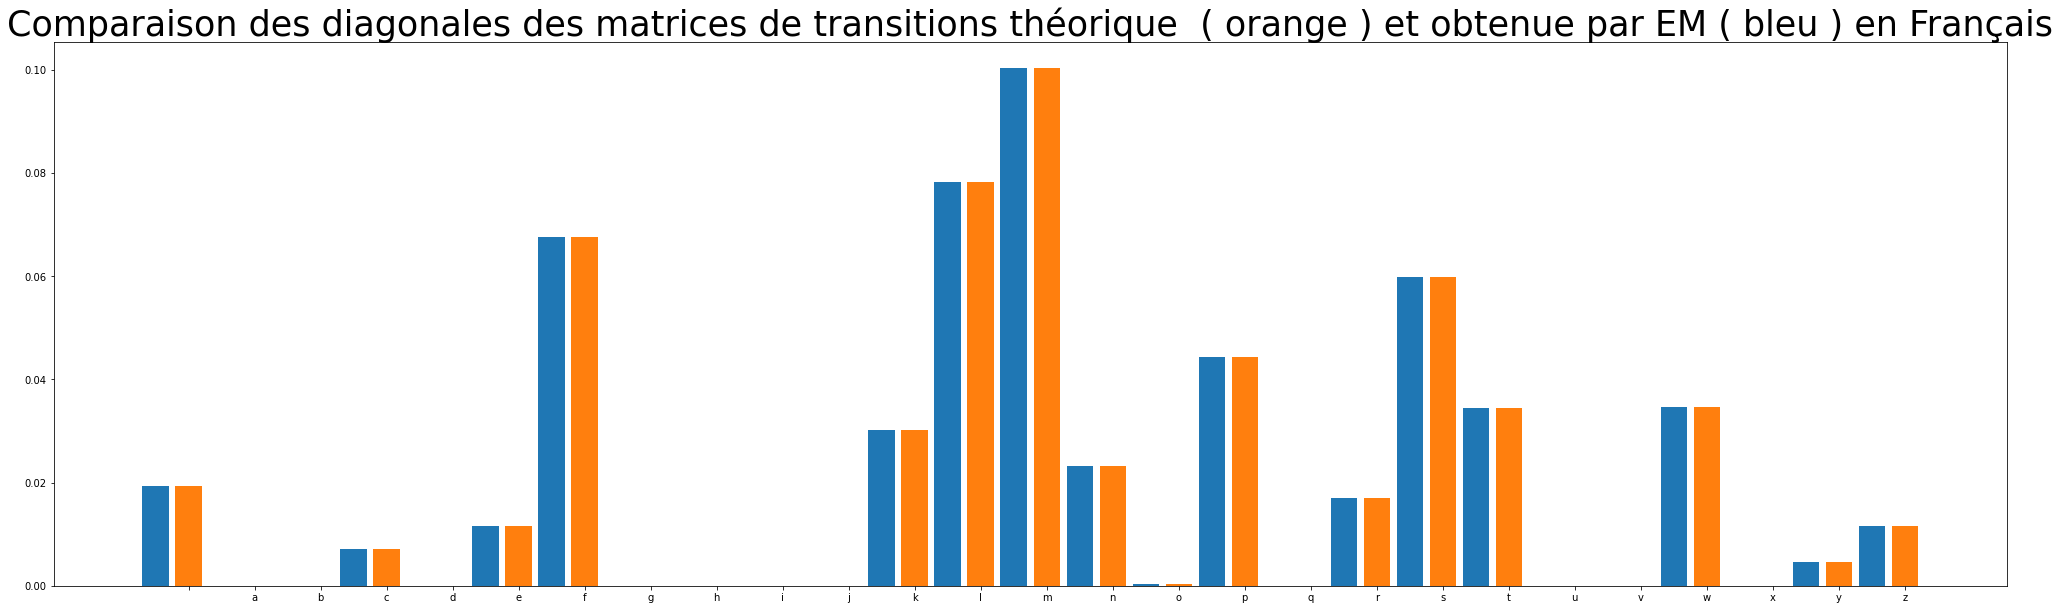

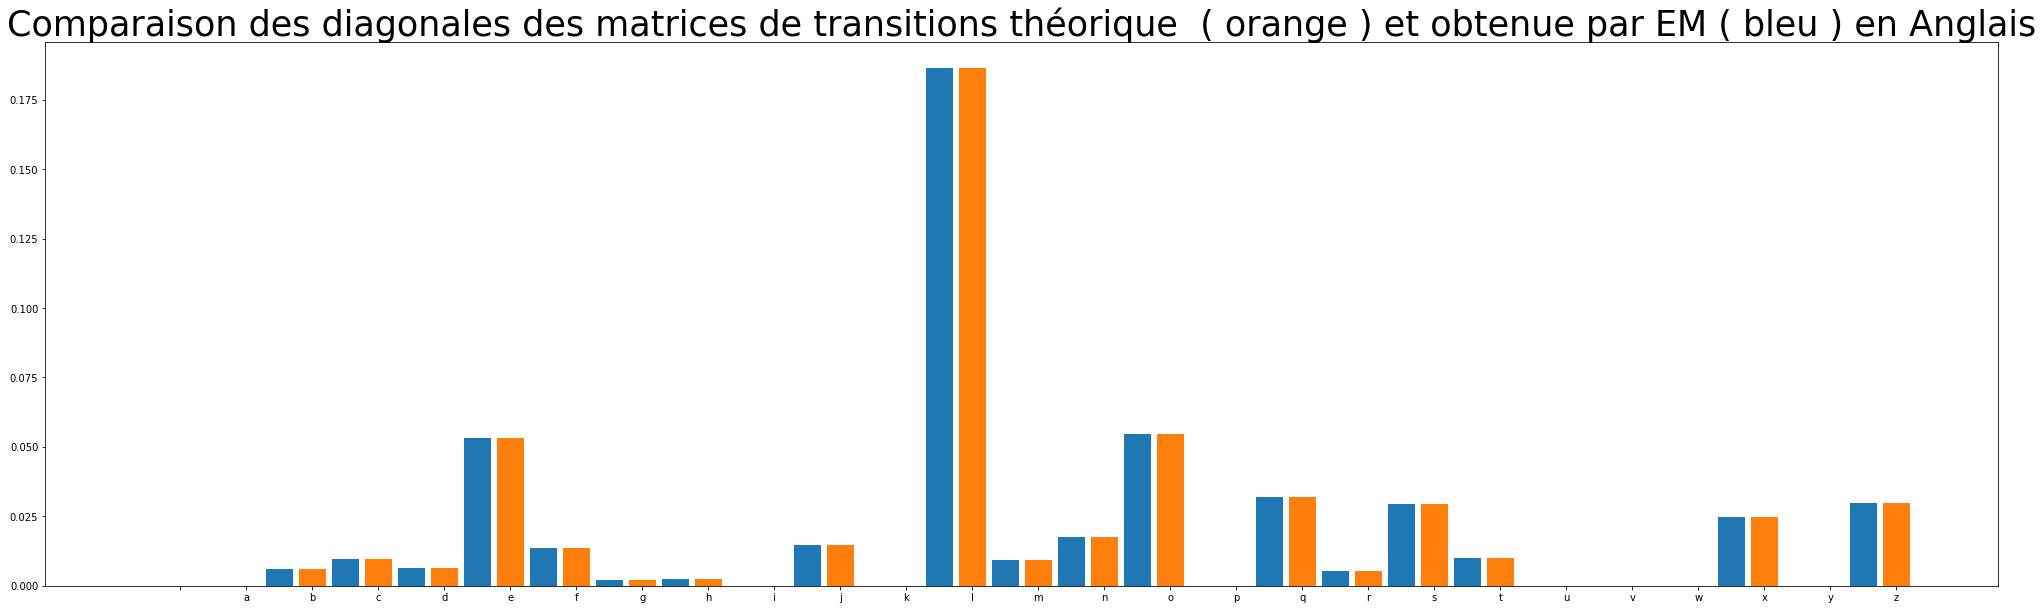

In [23]:
v=[' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
plt.bar(2*np.arange(27),m_fr)
plt.bar(2*np.arange(27)+1,proba_ini_fr,tick_label=v)
plt.title('Comparaison des vecteurs de probabilités théorique ( orange ) et obtenue par EM ( bleu ) en Français',fontsize=35)
plt.show()
plt.bar(2*np.arange(27),m_en)
plt.bar(2*np.arange(27)+1,proba_ini_en,tick_label=v)
plt.title('Comparaison des vecteurs de probabilités théorique ( orange ) et obtenue par EM ( bleu ) en Français',fontsize=35)
plt.show()
plt.bar(2*np.arange(27),np.diag(mat_fr))
plt.bar(2*np.arange(27)+1,np.diag(trans_matrix_fr),tick_label=v)
plt.title('Comparaison des diagonales des matrices de transitions théorique  ( orange ) et obtenue par EM ( bleu ) en Français',fontsize=35)
plt.show()
plt.bar(2*np.arange(27),np.diag(mat_en))
plt.bar(2*np.arange(27)+1,np.diag(trans_matrix_en),tick_label=v)
plt.title('Comparaison des diagonales des matrices de transitions théorique  ( orange ) et obtenue par EM ( bleu ) en Anglais',fontsize=35)
plt.show()

### 2)

On définit notre classifieur Markovien :

In [74]:
def classifMC(text,ea_fr,ea_en,em_fr,em_en,epr_fr,epr_en,verbose=False):
    v=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    text=remp_carac(text)
    c=1
    ea_fr[ea_fr==0]=np.min(ea_fr[ea_fr!=0])*10**-10
    ea_fr=ea_fr/np.sum(ea_fr)
    ea_en[ea_en==0]=np.min(ea_en[ea_en!=0])*10**-10
    ea_en=ea_en/np.sum(ea_en)
    em_fr[em_fr==0]=np.min(em_fr[em_fr!=0])*10**-10
    i=0
    while i<27:
        em_fr[i,:]=em_fr[i,:]/sum(em_fr[i,:])
        i=i+1
    em_en[em_en==0]=np.min(em_en[em_en!=0])*10**-10
    while i<27:
        em_en[i,:]=em_en[i,:]/sum(em_en[i,:])
        i=i+1
    while c<1000:
        if MC(ea_fr,em_fr,text,c)*epr_fr != MC(ea_en,em_en,text,c)*epr_en:
            break
        c=c+1
    res_fr=MC(ea_fr,em_fr,text,c)*epr_fr
    res_en=MC(ea_en,em_en,text,c)*epr_en
    print(res_fr)
    print(res_en)
    if res_fr<res_en:
        if verbose==True:
            print("Le texte est en Anglais !")
        return 1
    else:
        if verbose==True:
            print("Le texte est en Français !")
        return -1
p=0
clmc=np.array([])
while p<31:
    text=Data[p][0]
    print("Numéro",p)
    clmc=np.append(clmc,classifMC(text,m_fr,m_en,mat_fr,mat_en,pr_fr,pr_en,verbose=True))
    p=p+1

Numéro 0
6.145060785621738e-210
0.0
Le texte est en Français !
Numéro 1
3.758967436636467e-291
0.0
Le texte est en Français !
Numéro 2
2.309356680388104e-174
0.0
Le texte est en Français !
Numéro 3
2.6130606928414243e-242
0.0
Le texte est en Français !
Numéro 4
2.4368243120939744e-234
0.0
Le texte est en Français !
Numéro 5
6.3269625612411314e-173
0.0
Le texte est en Français !
Numéro 6
1.4654038035470508e-250
0.0
Le texte est en Français !
Numéro 7
7.64779667314161e-230
0.0
Le texte est en Français !
Numéro 8
7.44967658e-314
0.0
Le texte est en Français !
Numéro 9
1.8872126280894612e-203
0.0
Le texte est en Français !
Numéro 10
1.87148944415517e-296
0.0
Le texte est en Français !
Numéro 11
6.610078208867611e-189
0.0
Le texte est en Français !
Numéro 12
7.120830652387061e-249
0.0
Le texte est en Français !
Numéro 13
1.14331036166563e-310
0.0
Le texte est en Français !
Numéro 14
2.5198382023355766e-192
0.0
Le texte est en Français !
Numéro 15
1.667251542141677e-271
0.0
Le texte est en F

### 3)

On fait de la validation croisée avec le classifieur obtenu :

[ 1  2  3  4  7  8 10 11 12 13 14 17 18 20 24 25 26 28 29 30]
[ 0  5  6  9 15 16 19 21 22 23 27]
Il reste 19 étapes pour le calcul des fréquences !
Il reste 18 étapes pour le calcul des fréquences !
Il reste 17 étapes pour le calcul des fréquences !
Il reste 16 étapes pour le calcul des fréquences !
Il reste 15 étapes pour le calcul des fréquences !
Il reste 14 étapes pour le calcul des fréquences !
Il reste 13 étapes pour le calcul des fréquences !
Il reste 12 étapes pour le calcul des fréquences !
Il reste 11 étapes pour le calcul des fréquences !
Il reste 10 étapes pour le calcul des fréquences !
Il reste 9 étapes pour le calcul des fréquences !
Il reste 8 étapes pour le calcul des fréquences !
Il reste 7 étapes pour le calcul des fréquences !
Il reste 6 étapes pour le calcul des fréquences !
Il reste 5 étapes pour le calcul des fréquences !
Il reste 4 étapes pour le calcul des fréquences !
Il reste 3 étapes pour le calcul des fréquences !
Il reste 2 étapes pour le calcul des fréque

<ipython-input-12-a054f33c1a0b>:17: RuntimeWarning: overflow encountered in double_scalars
  proba=nb*proba*A[k,j]


44
43
42
41
40
39
[1.00000000e-10 1.00000000e-10 2.37771590e-05 1.00000000e-10
 1.00000000e-10 1.00000000e-10 1.00000000e-10 1.00000000e+00
 1.00000000e-10 1.00000000e+00 1.00000000e-10 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.65916595e-03 1.00000000e+00]
0.5000841471954725
15
14
13
12
11
10
[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]
0.450000000055
10
[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]
0.450000000055
10
[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]
0.450000000055
10
[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]
0.45000000005

/home/lakrout/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0
5.41338867336808e-303
[ 0  1  2  3  5  6  7  9 10 12 15 16 17 18 19 21 22 23 25 27 28]
[ 4  8 11 13 14 20 24 26 29 30]
Il reste 20 étapes pour le calcul des fréquences !
Il reste 19 étapes pour le calcul des fréquences !
Il reste 18 étapes pour le calcul des fréquences !
Il reste 17 étapes pour le calcul des fréquences !
Il reste 16 étapes pour le calcul des fréquences !
Il reste 15 étapes pour le calcul des fréquences !
Il reste 14 étapes pour le calcul des fréquences !
Il reste 13 étapes pour le calcul des fréquences !
Il reste 12 étapes pour le calcul des fréquences !
Il reste 11 étapes pour le calcul des fréquences !
Il reste 10 étapes pour le calcul des fréquences !
Il reste 9 étapes pour le calcul des fréquences !
Il reste 8 étapes pour le calcul des fréquences !
Il reste 7 étapes pour le calcul des fréquences !
Il reste 6 étapes pour le calcul des fréquences !
Il reste 5 étapes pour le calcul des fréquences !
Il reste 4 étapes pour le calcul des fréquences !
Il reste 3 étape

([<matplotlib.axis.XTick at 0x7f6ed60dfc40>,
 [Text(1, 0, 'acc'),
  Text(2, 0, 're'),
  Text(3, 0, 'roc'),
  Text(4, 0, 'pr'),
  Text(5, 0, 'f1')])

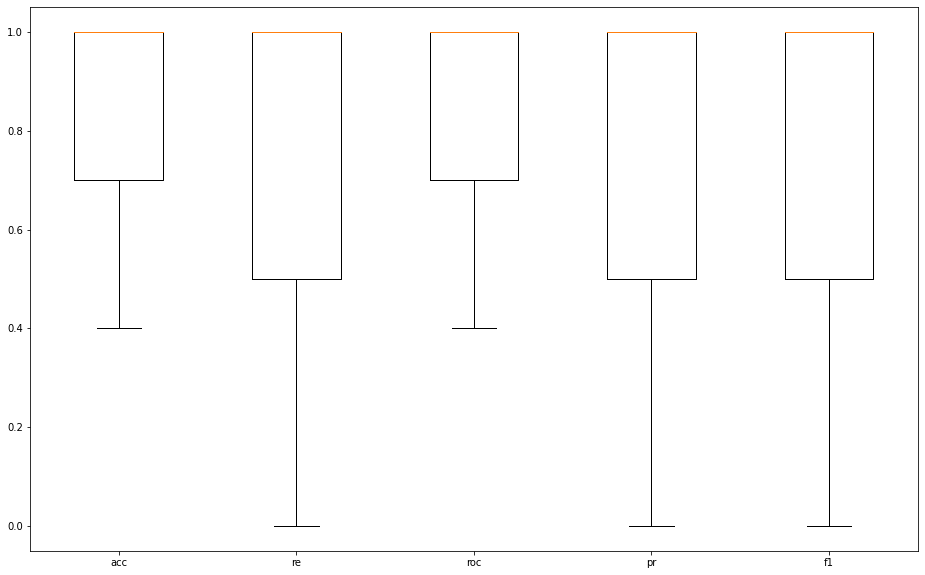

In [16]:
from sklearn.model_selection import KFold
from sklearn import metrics
from matplotlib import rcParams

Data2=np.array(Data)
Data2=Data2[:,0]
kf = KFold(n_splits=3,shuffle=True)
i=0
label=np.zeros(31)
while i<16:
    label[i]=-1
    i=i+1
while i<31:
    label[i]=1
    i=i+1
acc=[]
re=[]
roc=[]
pr=[]
f1=[]
for a,b in kf.split(Data2,label):
    print(a)
    print(b)
    data_train=Data2[a]
    label_train=label[a]
    data_test=Data2[b]
    label_test=label[b]
    i=0
    while i<len(data_train):    
        data_train[i]=remp_carac(data_train[i])
        i=i+1
    data_train=np.array(data_train)
    v=[' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    v=np.array(v)
    proba_ini_train=np.zeros((len(data_train),len(v)))
    i=0
    while i<len(data_train):
        j=0
        while j<len(v):
            h=0
            while h<len(data_train[i]):
                if data_train[i][h]==v[j]:
                    proba_ini_train[i,j]=proba_ini_train[i,j]+1
                h=h+1
            j=j+1
        proba_ini_train[i,:]=proba_ini_train[i,:]/np.sum(proba_ini_train[i,:])
        i=i+1
        print('Il reste',len(data_train)-i,'étapes pour le calcul des fréquences !')
    trans_matrix_train=np.zeros((len(data_train),27,27))
    i=0
    while i<len(data_train):
        j=1
        while j<len(data_train[i]):
            k=0
            while k<len(v):
                if data_train[i][j]==v[k]:
                    m=0
                    while m<len(v):
                        if data_train[i][j-1]==v[m]:
                            trans_matrix_train[i,m,k]=trans_matrix_train[i,m,k]+1
                        m=m+1
                k=k+1
            j=j+1
        i=i+1
        print('Il reste encore',len(data_train)-i,'étapes avant le calcul des matrices de transitions !' )
    i=0
    while i<len(data_train):
        j=0
        while j<27:
            if sum(trans_matrix_train[i,j,:])!=0:
                trans_matrix_train[i,j,:]=trans_matrix_train[i,j,:]/sum(trans_matrix_train[i,j,:])
            else:
                trans_matrix_train[i,j,:]=1/27*np.ones((27))
            j=j+1
        i=i+1
    (ta_fr,ta_en,tm_fr,tm_en,tpr_fr,tpr_en)=MC_EM(data_train,proba_ini_train,trans_matrix_train,moy=None,var=None,prop=None,eps=10**(-5),n=10,cond_vrais=False,verbose=False)
    i=0
    prediction_test=np.array([])
    while i<len(data_test):
        prediction_test=np.append(prediction_test,classifMC(data_test[i],ta_fr,ta_en,tm_fr,tm_en,tpr_fr,tpr_en,verbose=False))
        i=i+1
    acc.append(metrics.accuracy_score(label_test, prediction_test))
    re.append(metrics.recall_score(label_test, prediction_test,pos_label=-1))
    roc.append(metrics.accuracy_score(label_test, prediction_test))
    pr.append(metrics.precision_score(label_test, prediction_test,pos_label=-1))
    f1.append(metrics.f1_score(label_test, prediction_test,pos_label=-1))
rcParams['figure.figsize'] = 35,10
plt.subplot(121)
plt.boxplot([acc,re,roc,pr,f1])
plt.xticks([1,2,3,4,5],["acc", "re", "roc","pr","f1"])

### Exercise 4

### 1) 

On crée le texte avec une probabilité initiale de choisir un texte francais égale à la proportion de texte en francais ( pr_fr ) et une matrice de transition de passer d'une langue à une autre egale à $[[0.9,0.1],[0.1,0.9]]$ :

In [44]:
i=0
u=0
p_ini=np.array([pr_fr,pr_en])
mat_ini=np.array([[0.9,0.1],[0.1,0.9]])
langue=2*np.random.binomial(1,pr_fr)-1
Text_melange=''
label_melange=np.ones((1000))
longeur=0
l=0
while u<1000:
    if u>0:
        l=l+fin-debut+1
    lance=np.random.randint(10)
    cnt=1
    while lance!=0:
        cnt=cnt+1
        lance=np.random.randint(10)
    if langue==-1:
        text=np.random.randint(16)
    else:
        text=np.random.randint(15)+16
    debut=np.random.randint(len(Data[text][0])-cnt)
    j=debut
    while j>0:
        if Data[text][0][j]==' ':
            break
        j=j-1
    debut=j+1
    j=j+cnt
    while j<len(Data[text][0]):
        if Data[text][0][j]==' ':
            break
        j=j+1
    fin=j
    longeur=longeur+fin-debut+1
    if u==0:
        label_melange[0:longeur+1]=langue
    if u!=0:
        label_melange[l+1:longeur+1]=langue
    Text_melange=''.join((Text_melange, Data[text][0][debut:fin+1]))
    u=len(Text_melange)
    langue=-langue
Text_melange=Text_melange[0:1000]

### 2)

On ecrit l'algorithme de Viterbi :

In [57]:
def algo_viterbi(pb_class,texte,mat_trans,freq_matrix):
    l=len(texte)
    T_1=np.zeros((2,l))
    T_2=np.zeros((2,l)) 
    i=0
    while i<len(v):
        if texte[0]==v[i]:
            y=i
        i=i+1
    T_1[0,0]=pb_class[0]*freq_matrix[0,y]
    T_2[0,0]=0
    T_1[1,0]=pb_class[1]*freq_matrix[1,y]
    T_2[1,0]=0
    i=1
    while i<l:
        k=0
        while k<len(v):
            if texte[i]==v[k]:
                y=k
            k=k+1
        T_1[0,i]=max(T_1[0,i-1]*freq_matrix[0,y]*mat_trans[0,0],T_1[1,i-1]*freq_matrix[0,y]*mat_trans[1,0])
        if T_1[0,i]==T_1[0,i-1]*freq_matrix[0,y]*mat_trans[0,0]:
            T_2[0,i]=0
        else:
            T_2[0,i]=1
        T_1[1,i]=max(T_1[0,i-1]*freq_matrix[1,y]*mat_trans[0,1],T_1[1,i-1]*freq_matrix[1,y]*mat_trans[1,1])
        if T_1[1,i]==T_1[0,i-1]*freq_matrix[1,y]*mat_trans[0,1]:
            T_2[1,i]=0
        else:
            T_2[1,i]=1
        i=i+1
    etats=np.ones((len(texte)))
    z=np.zeros((len(texte)))
    if  T_1[0,len(texte)-1]>T_1[1,len(texte)-1]:
        etats[len(texte)-1]=0
        z[len(texte)-1]=0
    else:
        etats[len(texte)-1]=1
        z[len(texte)-1]=1
    j=len(texte)-2
    while j>-1:
        l=int(z[j+1])
        z[j]=T_2[l,j]
        etats[j]=z[j]      
        j=j-1
    etats[etats==0]=-1
    return etats

In [76]:
freq_matrix=np.zeros((2,len(v)))
freq_matrix[0,:]=m_fr
freq_matrix[1,:]=m_en
etats=algo_viterbi(np.array([pr_fr,pr_en]),Text_melange,mat_ini,freq_matrix)
acc=0
i=0
while i<100:
    erreurs=abs(label_melange-etats)
    acc=acc+len(erreurs[erreurs==2])/len(erreurs)
    i=i+1
acc=acc/100
print(acc)
acc2=0
i=0
while i<100:
    erreurs=abs(label_melange[0:14*18]-etats[0:14*18])
    acc2=acc2+len(erreurs[erreurs==2])/len(erreurs)
    i=i+1
acc2=acc2/100
print(acc2)

0.3960000000000006
0.2976190476190475


### 3)

On remarque que l'algorithme de Viterbi a du mal à repérer les sauts de langue avec un taux d'erreurs d'environs 0.4. On remarque aussi que l'algorithme classe à partir d'un certains rang toutes les lettres sur une même classe.
Pourtant je ne suis pas parvenu à repérer une erreur dans mon code. Si on calcule le taux d'erreur avant ce problème le taux diminue et passe à 0.3 environs.